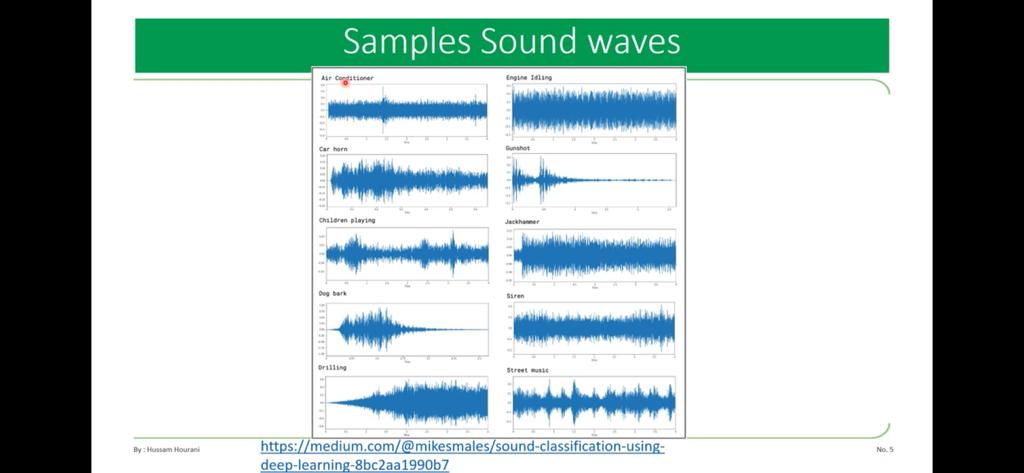

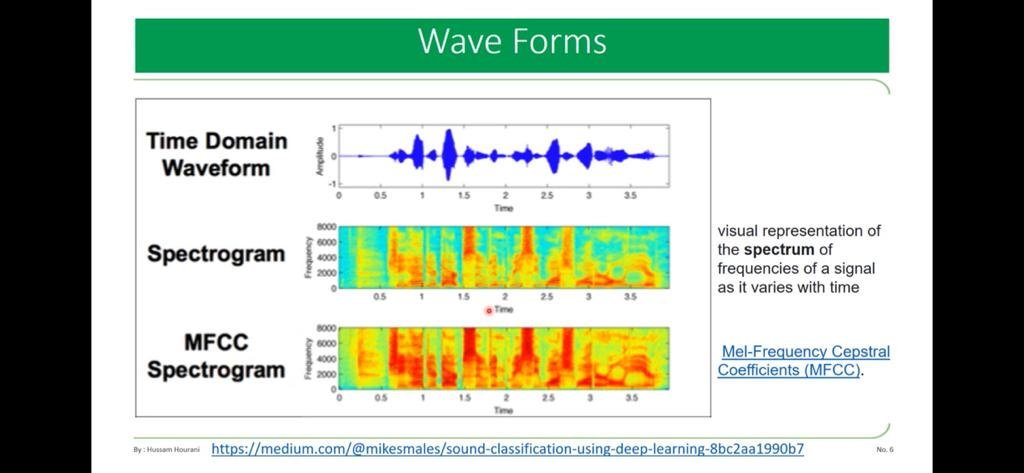

# Wave Plotting using Librose

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
data, sampling_rate = librosa.load('input/train/audio/yes/0a7c2a8d_nohash_0.wav')
plt.figure(figsize= (12, 4))
librosa.display.waveplot (data, sr=sampling_rate)

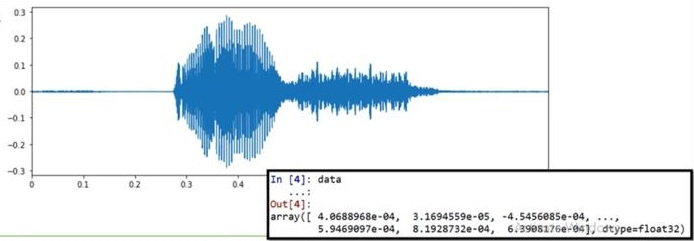

# Sampling

In [ ]:
import librosa
import librosa.display
data, sampling_rate = librosa. load('input/train/audio/yes/0a7c2a8d_nohash_0.wav')
print("Data :", data)
print("len Data :", len (data))
print("sampling_rate :", sampling_rate)
print ()
data, sampling_rate = librosa. load('input/train/audio/yes/0a7c2a8d_nohash_0.wav',sr=None)
print ("Data :", , data)
print("len Data :", len (data))
print("sampling_rate :", sampling_rate)
print ()
data, sampling_rate = librosa. load('input/train/audio/yes/0a7c2a8d_nohash_0.wav',sr=8000)
print ("Data :",data)
print("len Data :", len (data))
print ("sampling_rate sampling_rate")

output:

Data: [ 4.0688968e-04 3.1694559e-05 - 4.5456085e-04           
5.9469097e-04          
8.1928732e-04 6.3908176e-04]           
len Data : 22050            
sampling_rate: 22050            
Data: [ 0.00042725 -0.00021362 -0.00042725 ... 0.00057983 0.00061035    
0.000823971   
len Data: 16000
sampling_rate: 16000               
Data: [ 0.00011731 -0.00025583 0.00021972 ...
0.00019996 0.000146    
0.00074757]                   
len Data : 8000                        
sampling_rate : 8000                

# Spectrogram

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms. use ('seaborn-muted")
data, sampling_rate = librosa. load ('input/train/audio/yes/0a7c2a8d_nohash_0.wav')
melspec = librosa.feature.melspectrogram(y=data,sr=sampling_rate)
plt.figure ()
librosa.display.specshow (melspec, y_axis='mel', ×_axis='time')
plt. colorbar()

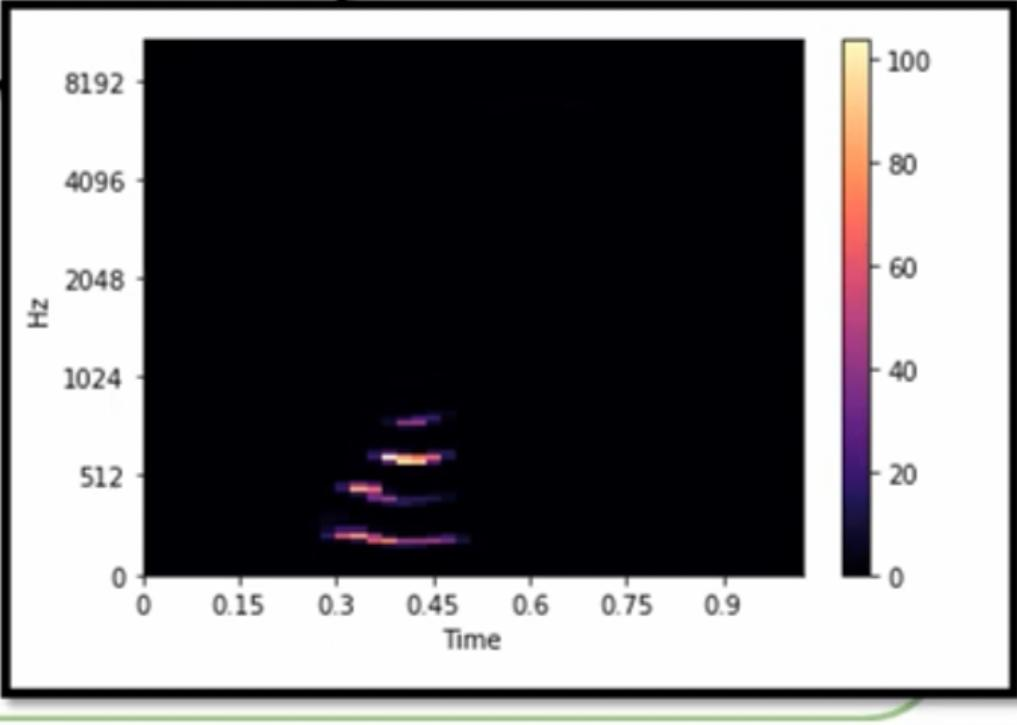

# MFCC

In [ ]:
import librosa
import librosa.display
import librosa.feature
import matplotlib.pyplot as plt
data, sampling_rate = librosa.load('input/train/audio/yes/0a7c2a8d_nohash_0.wav')
mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40)
# Visualize the MFCC series
plt.figure(figsize= (10, 4))
librosa.display.specshow(mfccs, ×_axis='time')
plt.colorbar ()
plt.title('MFCC')
plt.tight_layout ()
plt. show()

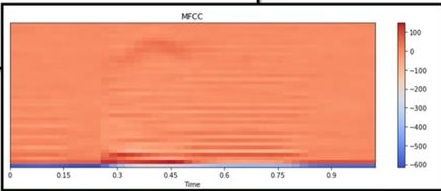

# Wave Plotting using Matplotlib

In [ ]:
import librosa #for audio processing
import matplotlib.pyplot as plt
import numpy as np
train audio_path = 'input/train/audio/'
samples, sample_rate = librosa. load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize= (14, 8))
ax1 = fig.add_suSplot (211)
ax1. set_title ('Raw wave of ' + ' .. /input/train/audio/yes/ea7c2a8d_nohash_0.wav')
ax1. set_xlabel ('time')
ax1.set label ('Amplitude')
ax1.plot(np. linspace(0, sample_rate/len (samples), sample_rate), samples)

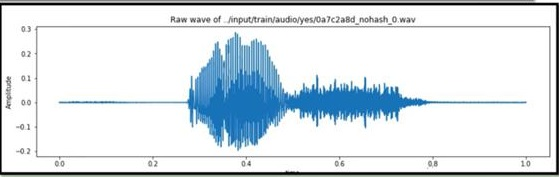

# Speech-to-Text Model in Python

In [ ]:
import os
import librosa #for audio processing
import numpy as np
from keras.layers import Dense, Dropout, Flatten, ConviD, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, Modelcheckpoint
from keras import backend as K
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
train_audio_path = 'input/train/audio2/'
labels=os.listdir (train_audio_path)
all_wave = []
all_label = []
for label in labels:
    print (label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav,sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len (samples)== 8000) :
            all_wave.append(samples)
            all_label.append(label)
le = LabelEncoder ()
y=le.fit_transform(all_label)
classes= list(le.classes_)
from keras.utils import np_utils
y=p_utils.to_categorical(y, num_classes=len (labels))
all_wave = np.array (all_wave) .reshape(-1, 8000,1)
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(np.array(all_wave), np. array(y),stratifysy,test_size = 0.2, random_state=777, shuffle=True)
K. clear_session ()
inputs = Input (shape= (8000,1))
#FIRSt conVID Laver
conv = ConviD (8,13, padding= 'valid', activation='relu', strides=1) (inputs)
conv = MaxPooling1D (3) (conv)
conv = Dropout (0.3) (conv)
#Second Conv1D Layer
conv = ConviD (16, 11, padding='valid', activation='relu', strides=1) (conv)
conv = MaxPooling1D(3) (conv)
conv = Dropout (0.3) (conv)
#Third Conv1D layer
conv = Conv1D (32, 9, padding='valid', activation='relu', strides=1) (conv)
conv = MaxPooling1D(3) (conv)
conv = Dropout (0.3) (conv)
#Fourth Conv1D layer
conv = ConViD (64, 7, padding= 'valid', activation='relu', strides=1) (conv)
conv = MaxPooling1D (3) (conv)
conv = Dropout (0.3) (conv)
#Flatten Layer
conv = Flatten() (conv)
#Dense Layer 1
conv = Dense (256, activation='relu') (conv)
conv = Dropout (0.3) (conv)
#Dense Layer 2
conv = Dense (128, activation='relu') (conv)
conv = Dropout (0.3) (conv)
outputs = Dense(len (labels), activation='softmax') (conv)
model = Model(inputs, outputs)
model. summary ()
model. compile (loss= 'categorical_crossentropy'‚optimizer='adam',metrics=['accuracy'])
es = EarlyStopping (monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001)
mc = Mode1checkpoint ('best_model2.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history=model.fit(x tr, y_tr „epochs=100, callbacks= [es, mc], batch_size=32,validation data=(x val,y val))
pyplot.plot (history.history['loss '], label='train')
pyplot.plot (history.history['val_loss'], label='test')
pyplot. legend ()
pyplot. show()

# Predict wav files

In [ ]:
import librosa #for audio processing
import IPython.display as ipd
import numpy as np
from keras.models import load_model
import os
train audio path = 'input/train/audio2/'
classes=os.listdir (train_audio_path)
model=load_model('best_mode12.hdf5')
def predict(audio):
    prob=model.predict (audio.reshape (1,8000,1))
    index=np.argmax( prob[0])
    return classes[index]
#reading the voice commands
samples, sample_rate = librosa. load('test_down.wav', sr = 16000)
samples = librosa. resample (samples, sample_rate, 8000)
ipd.Audio (samples, rate=8000)
print (predict (samples))
samples, sample_rate = librosa. load('test_left.wav', sr = 16000)
samples = librosa.resample (samples, sample_rate, 8000)
ipd.Audio (samples, rate=8000)
print (predict (samples))

Output:    
down left

# Recording and prediction

In [ ]:
!pip install soundfile

In [ ]:
!pip install sounddevice

In [ ]:
import librosa #for audio processing
import IPython.display as ipd
import numpy as np
from keras.models import load_model
import sounddevice as sd
import soundfile as sf
import os
train audio path = 'input/train/audio2/'
classes=os.listdir (train_audio_path)
model=load_model ('best_mode12.hdf5')
def predict (audio):
    prob=model.predict (audio.reshape (1,8000,1))
    index=p.argmax (prob[0])
    return classes [index]
samplerate = 16000
duration = 1 # seconds
filename = 'testing.wav'
print("start")
mydata = sd.rec (int (samplerate * duration), samplerate=samplerate, channels=1, blocking=True)
print("end")
sd.wait ()
sf.write(filename, mydata, samplerate)
#reading the voice commands
samples, sample_rate = librosa. load(filename, sr = 16000)
samples = librosa.resample (samples, sample_rate, 8000)
ipd.Audio (samples, rate=8000)
print(predict (samples))

Output:         
start end left

# Recording samples

In [ ]:
import sounddevice as sd
import soundfile as sf
train_audio_path = 'input/train/audio2/hala/'
samplerate = 16000
duration = 1 # seconds
filename = train_audio_path + 'halale.wav'
print("start")
mydata = sd.rec(int (samplerate * duration), samplerate=samplerate, channels=1, blocking=True)
print ("end")
sd.wait ()
sf.write(filename, mydata, samplerate)

# Scipy wavefile

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
frequency_sampling, audio_signal = wavfile.read("input/train/audio/yes/0a7c2a8d_Pohash_0.wav")
print('\nsignal shape:', audio_signal. shape)
print( 'Signal Datatype:', audio_signal.dtype)
print ('Signal duration:', round(audio_signal.shape [0] / 10 float (frequency_sampling), 2), 'seconds')
audio_signal = audio_signal / np.power (2, 15)
audio_signal = audio_signal [:100]
time_axis = 1000 * np.arange(0, len (audio_signal), \
                             1) / float (frequency_sampling)
plt.plot (time_axis, audio_signal, color='blue')
plt.Xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

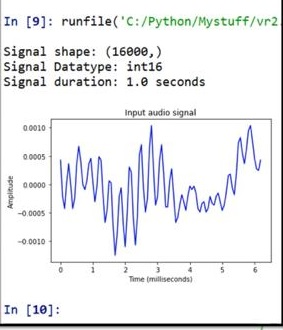

# MFCC Wave form

In [ ]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mcc, logfbank
frequency_sampling, audio_signal = wavfile. read(\
                                                 "input/train/audio/yes/0a7c2a8d_nohash_0.wav")
audio_ signal = audio signal [:15000]
features_mfcc = mcc(audio_signal, frequency_sampling)
print("\nMFCC: \nNumber of windows =", features_mfcc.shape [0])
print( 'Length of each feature =', , features mfcc.shape[1])
features_mfcc = features_mfcc.T
plt.matshow(features_mfcc)
plt.title('MFCC')
filterbank_features = logfbank(audio_signal, frequency_sampling)
print ('\nFilter bank: \nNumber of windows =', filterbank_features.shape [0])
print('Length of each feature =', filterbank_features. shape[1])
filterbank_features = filterbank_features.T
plt. matshow(filterbank_features)
plt.title('Filter bank")
plt.show()

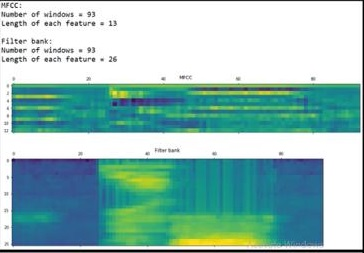

# References:

https://www.kaggle.com/c/tensorflow-speech-recognition-challenge/data

https://github.com/librosa/tutorial/blob/master/Librosa%20tutorial.ipynb

https://www.analyticsvidhya.com/blog/2019/07/learn-build-first-speech-to-text-model-python/

https://www.analyticsvidhya.com/blog/2019/07/learn-build-first-speech-to-text-model-python/

https://www.tutorialspoint.com/artificial_intelligence_with_python/artificial_intelligence_with_python_speech_recoonition.htm